

*   **Nama: Muhammad Revy Aulia**
*   **email: muhammad.revy20@gmail.com**
*   **ID Dicoding: mrevya**








# 1. Menentukan Pertanyaan Bisnis
*  Bagaimana demografi dari pembeli?
* Bagaimana demografi dari penjual?
* Apa produk yang laris yang memiliki revenu terbesar dan kurang laris yang memiliki revenue lebih kecil?







##Import Semua Package atau Libraries

In [2]:
!pip install numpy scipy pandas matplotlib seaborn streamlit GeoPandas datetime python-dateutil pytz folium geopy

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit
import geopandas as gpd
import datetime as dt
import folium
import geopy


# Data Wrangling

## Gathering Data

### customers_dataset


In [5]:
customers_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/customers_dataset.csv')
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Insight
*   Pembeli menyebar di berbagai daerah di negara Brazil
*   Pembeli beragam dari berbagai kota di negara Brazil



### Sellers_dataset

In [6]:
sellers_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Insight:
*   Penjual berasal dari berbagai daerah di Brazil



### Products_dataset

In [7]:
products_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/products_dataset.csv')
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Insight:
*   Ada beberapa macam produk yang dijual oleh penjual.
*   Produk yang memiliki berat terbesar adalah *artes* dan prooduk yang paling ringan beratnya adalah *esporte_lazer*
*   Produk yang memiliki bobot teringan adalah *esporte_lazar*






### Orders_dataset

In [8]:
orders_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/orders_dataset.csv')
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Insight
*   Semua barang telah dikirimkan kepada pembeli.
*   Semua barang yang telah dipesan oleh para pembeli mendapatkan konfirmasi yang cepat dari penjual kira-kira kurang dari 12 jam.
* Semua barang yang dikirimkan kepada pembeli estimasi di bawah 1 bulan.   







### orders_review_dataset

In [9]:
orders_review_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/order_reviews_dataset.csv')
orders_review_dataset_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Insight
*   Rata-rata pembeli memberikan review score 4.8. Rata-rata pembeli puas dengan pelayanan dan barang yang dibeli dari penjual.
*  3 Pelanggan memberikan review comment dan 2 orang yang tidak memberikan review comment.
* Rata-rata penjual menjawab review dari pembeli di hari yang sama dengan pembeli memberikan review barang.   





### orders payment_dataset

In [10]:
orders_payment_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/order_payments_dataset.csv')
orders_payment_dataset_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Insight
*   Semua pembeli membeli barang dengan menggunakan kartu kredit
*   Rata-rara payment value adalah 85.132
*   Rata-rata payment installments adalah 4






### orders_items_dataset

In [11]:
orders_items_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/order_items_dataset.csv')
orders_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Insight
*   Rata-rata harga barang adalah 142,38
*   Rata-rata freight_value adalah 16,404



### geolocation dataset

In [12]:
geolocation_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_dataset_df.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Insight
*   Semua Geolocation city ada di kota Sao Paulo



### product category name

In [13]:
products_category_name_df = pd.read_csv('/content/drive/MyDrive/Submission/E-Commerce Public Dataset/product_category_name_translation.csv')
products_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Insight
*   Ada berbagai macam kategori barang yang ada di E-Commerce



## Assesing Data

### Menilai Customers_dataset_df

In [14]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customers_dataset_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [16]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
customers_dataset_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Insight
*  Tidak ada missing value.
*  Jumlah duplikasi data adalah nol.
*   Data right-skewed distribution karena nilai mean lebih besar daripada nilai median(50%)
*  Nilai rangenya adalah 98.987
* Nilai interkuartil adalah 11.347









### Menilai Sellers_data_set_df

In [18]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [19]:
sellers_dataset_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [20]:
print("Jumlah duplikasi: ", sellers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
sellers_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### Insight
*   Tidak ada missing value
*   Tidak duplikat data
*   Data right-skewed karena nilai meannya lebih besar dari median(50%)
*   Nilai rangenya adalah 98.729
*   Nilai interkuartilnya adalah 57.459








### Menilai products_dataset

In [22]:
products_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [23]:
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [24]:
print("Jumlah duplikasi: ",products_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
products_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Insight
*   Ada 8 kolom yang memiliki missing value yaitu product category name, product name length, product description length, product photo qty, product weight g, product length cm, product height cm, dan product widht cm.
*   Jumlah missing value pada tiap 8 kolom tersebut adalah product category name berjumlah 610, product name length berjumlah 610, product description length berjumlah 610, product photo qty berjumlah 610, product weight g berjumlah 2, product length cm berjumlah 2, product height cm berjumlah 2, dan product widht cm berjumlah 2.
*   **Pada kolom product name length**, left-skewed distribution(mean < median(50%)), range nya adalah 71, dan interkuartil adalah 13.
*   **Pada kolom product description length**, right-skewed distribution(mean > median(50%)), rangenya adalah 3988, dan interkuartil adalah 2.
*   **Pada kolom product photos qty**, right-skewed distribution, rangenya adalah 19, dan interkuartilnya adalah 2.
*  **Pada kolom product weight g**, right-skewed distribution, rangenya adalah 40425, dan interkuartilnya adalah 1600.
*  **Pada kolom product length cm**, right-skewed distribution, rangenya adalah 98, dan interkuartilnya adalah 20.
*  **Pada kolom product height cm**, right-skewed distribution, rangenya adalah 103, dan interkuartilnya adalah 13.
*  **Pada kolom product width cm**, right-skewed distribution, rangenya adalah 112, dan interkuartilnya adalah 15.







### Menilai orders_dataset

In [26]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [28]:
print("Jumlah duplikat: ", orders_dataset_df.duplicated().sum())

Jumlah duplikat:  0


In [29]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Insight
*   Ada 3 kolom yang missing value yaitu order approved at dengan jumlah 160 missing value, order delivered carrier date dengan jumlah 1783 missing value, dan order delivered customer date dengan jumlah 2965 missing value.
*   Tidak ada duplikat data.
*   Total jumlah frekuensi dari 8 kolom dari orders data set adalah 97.064.



### Menilai Orders_review_dataset

In [30]:
orders_review_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
orders_review_dataset_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [32]:
print("Jumlah duplikat: ", orders_review_dataset_df.duplicated().sum())

Jumlah duplikat:  0


In [33]:
orders_review_dataset_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Insight
*   Ada 2 kolom yang memiliki missing value, yaitu review comment title dengan jumlah 87.656 missing value dan review comment message dengan jumlah 58.247 missing value.
*   Tidak ada duplikat data.
*   Pada review data set df, left-skewed distribution, rangenya adalah 4, dan interkuartil adalah 1.





### Menilai Orders_payment_dataset

In [34]:
orders_payment_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [35]:
orders_payment_dataset_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [36]:
print("Jumlah duplikat: ", orders_payment_dataset_df.duplicated().sum())

Jumlah duplikat:  0


In [37]:
orders_payment_dataset_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Insight
*  Tidak ada missing value.
*  Tidak ada duplikasi data.
*  **Pada kolom payment_sequential**, right-skewed distribution, rangenya adalah 28, dan interkuartilnya 0.
*  **Pada kolom payment installments**, right-skewed distribution, rangenya adalah 24, dan interkuartilnya adalah 3.
*  **Pada kolom payment value**, right-skewed distribution, rangenya adalah 13664, dan interkuartilnya 115,0475






### Menilai Orders_items_dataset

In [38]:
orders_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
orders_items_dataset_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [40]:
print("Jumlah duplikat: ", orders_items_dataset_df.duplicated().sum())

Jumlah duplikat:  0


In [41]:
orders_items_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Insight
*  Tidak ada missing value.
*  Tidak ada duplikasi data.
*  **Pada kolom order item id**, right-skewed distribution, rangenya 20, dan interkuartilnya adalah 0.
*  **Pada kolom price**, right-skewed distribution, rangenya adalah 67314,15, dan interkuartilnya adalah 95.
*  **Pada kolom freight value**, right-skewed distribution, rangenya adalah 409.68, dan interkuartilnya adalah 8,07.



### Menilai geolocation_dataset

In [42]:
geolocation_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [43]:
geolocation_dataset_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [44]:
print("Jumlah duplikat: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikat:  261831


In [45]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Insight
*   Tidak ada missing value
*   Ada duplikasi data dengan jumlah 261.831
*   **Pada kolom geolocation zip code prefix**, right-skewed distribution.
*   **Pada kolom geolocation lat**, right-skewed distribution.
*   **Pada kolom geolocation lng**, right-skewed distribution.




### Menilai Product_category_name

In [46]:
products_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [47]:
products_category_name_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [48]:
print("Jumlah duplikasi:",products_category_name_df.duplicated().sum())

Jumlah duplikasi: 0


In [49]:
products_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Insight
*   Tidak ada missing value.
*   Tidak ada duplikasi data.
*   Tidak ada incurate value.
*   Tidak ada inconsistent value.





## Cleaning Data

### Membersihkan products_dataset

#### Mengatasi Missing Value

In [50]:
products_dataset_df[products_dataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [51]:
products_dataset_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [52]:
products_dataset_df.fillna(value="cama_mesa_banho", inplace=True)

<ipython-input-52-78fd0525f89f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cama_mesa_banho' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df.fillna(value="cama_mesa_banho", inplace=True)


In [53]:
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


##### Insight
*   Pada kolom product_category_name, terdapat banyak missing value. Setelah melakukan value_counts(), terdapat produk bernama cama_mesa_banho yang memiliki nilai yang paling besar. Saya menggunakan fillna() untuk melakukan pergantian.
*  Pembersihan missing value pada kolom product_id, product_catagory_name, product_name_lenght, product_description_lenght, product_photos_qty, products_weight_g, product_length_cm, product_height_cm, dan product_width_cm.






### Membersihkan orders_dataset_df

#### Menangani Missing value

In [54]:
orders_dataset_df[orders_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [55]:
orders_dataset_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [56]:
orders_dataset_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [57]:
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


##### Insight
*   Proses pembersihan missing value berhasil dilakukan. Pada orders_dataset_df, terdapat 3 kolom yang memiliki missing value yaitu order_approved_at,	order_delivered_carrier_date, dan 	order_delivered_customer_date.
*   Proses mengatasi missing value dengan memilih salah satu kolom yang memiliki missing value dan dilakukan value_counts() untuk mengecek nilai-nilainya.
*   Terdapat value yang besar pada baris 2018-02-27 04:31:10, dilakukan fillna() untuk mengatasi missing value.
*   Missing value berhasil dilakukan.





### Membersihkan orders_review_dataset_df

#### Mengatasi Missing value

In [58]:
orders_review_dataset_df[orders_review_dataset_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [59]:
orders_review_dataset_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [60]:
orders_review_dataset_df.fillna(value="Recomendo", inplace=True)

In [61]:
orders_review_dataset_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


##### Insight
*   Terdapat missing value pada kolom review_comment_title	dan beberapa pada review_comment_message.
*   Mengatasi missing value dengan menghitung nilai pada kolom review_comment_title dan melakukan fillna() pada baris "Recomendo".




### Membersihkan geolocation_dataset_df

#### Menghilangkan duplikasi data

In [62]:
geolocation_dataset_df.drop_duplicates(inplace=True)

In [63]:
print("Jumlah duplikasi", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi 0


##### Insight
*   Duplikasi pada geolocation_dataset_df berhasil dilakukan.




# Exploratory Data Analysis

## Eksplorasi Data customers_dataset_df dan orders_dataset_df

In [64]:
customers_dataset_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [65]:
orders_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-12-20 00:00:00
freq,1,1,96478,3,169,1783,2965,522


In [66]:
orders_dataset_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### Jumlah Pelanggan berdasarkan Kota

In [67]:
customers_dataset_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)


,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


### Jumlah Pelanggan berdasarkan State

In [68]:
customers_dataset_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


### Menggabungkan Customers_dataset_df dan orders_dataset_df

In [69]:
new_customers_dataset_df = pd.merge(
    left=customers_dataset_df,
    right=orders_dataset_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
new_customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


### Insight
*   Persebaran pelanggan merata di berbagai kota di Negara Brazil. Sao Paulo, Rio De Janeiro, Belo Horizonte, Brasilia, dan
Curitiba menjadi kota yang memiliki pelanggan terbanyak.
*   Paling banyak negara bagian yang memiliki pelanggan adalah SP.
* Pada order dataset, ada 3 status yang memiliki nilai yang tertinggi yaitu delivered	dengan jumlah  96478, shipped	dengan jumlah 1107 canceled dengan jumlah	625.




## Eksplorasi sellers_dataset_df

In [70]:
sellers_dataset_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Jumlah Seller Berdasarkan Kota

In [71]:
sellers_dataset_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


### Jumlah Seller berdasarkan State

In [72]:
sellers_dataset_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


### Insight
*   Persebaran penjual merata di kota-kota di Brazil. Penjual terbanyak ada di kot Sao Paulo, Curitiba, Rio De Janeiro, Belo Horizonte, dan Ribeirao Preto.
* Kota-kota kecil juga memiliki penjual seperti Ivoti, Itirapina, Itau de Minas, Itapui, dan Xaxim.
* Persebaran penjual terbanyak di negara bagian SP, PR, dan MG.






## Eksplorasi products_dataset_df dan orders_items_dataset_df

In [73]:
products_dataset_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,cama_mesa_banho,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


### Jumlah produk yang laku terjual

In [74]:
products_dataset_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).reset_index().head(20)

,product_category_name,product_id
0,cama_mesa_banho,3639
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
5,automotivo,1900
6,informatica_acessorios,1639
7,brinquedos,1411
8,relogios_presentes,1329
9,telefonia,1134


In [75]:
orders_items_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


### Menggabungkan products_dataset_df dan orders_items_dataset_df

In [76]:
new_products_dataset_df = pd.merge(
    left=products_dataset_df,
    right=orders_items_dataset_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
new_products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [77]:
new_products_dataset_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name,order_id
0,cama_mesa_banho,10860
1,beleza_saude,8836
2,esporte_lazer,7720
3,informatica_acessorios,6689
4,moveis_decoracao,6449
5,utilidades_domesticas,5884
6,relogios_presentes,5624
7,telefonia,4199
8,automotivo,3897
9,brinquedos,3886


### Insight
*   Terdapat berbagai produk yang dijual oleh para penjual di E-Commerce, produk terbanyak yang dibeli oleh pelanggan adalah *cama mesa banho* yaitu meja kamar mandi, esporte lazer, dan *moveis decoracao* yaitu furnitur untuk dekorasi.
* Rata-rata harga adalah 120,653739; standar deviasi harga adalah 183,633928, dan maksimum harga adalah 6735.
* Barang paling banyak dengan harga 59,90; 69,90, dan 49,90.
Harga termahal barang adalah 6.735.
* Produk terbanyak adalah cama_mesa_banho dengan jumlah 3639 ,esporte_lazer dengan jumlah 2867, dan moveis_decoracao dengan jumlah 2657.



## Eksplorasi orders_dataset_df dan orders_payment_dataset_df

In [78]:
orders_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-12-20 00:00:00
freq,1,1,96478,3,169,1783,2965,522


In [79]:
orders_dataset_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [80]:
orders_payment_dataset_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [81]:
orders_payment_dataset_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

### Menggabungkan orders_dataset_df dan orders_payment_dataset_df

In [82]:
new_orders_dataset_df = pd.merge(
    left=orders_dataset_df,
    right=orders_payment_dataset_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new_orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


### Insight
* Order status yang tertinggi adalah delivered, shipped, dan canceled.
* Rata-rata nilai pembayaran adalah 154,100380, standar deviasi adalah 217,494064, dan maksimum adalah 13664.080000.
* Nilai pembayaran yang paling banyak adalah 50; 77,57; dan 100.
* Pembeli banyak menggunakan kartu kredit sebagai pembayaran dengan jumlah 76.505.
* Dari semua pembayaran yang tersedia di E-Commerce, banyak pelanggan memilih kartu kredit. Kita dapat melihat distribusi harga barang yang dibeli dengan kartu kredit berkisar dari 0,01 hingga 13.664.08.

## Eksplorasi orders_review_dataset_df

In [83]:
orders_review_dataset_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Recomendo,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,88079,58347,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [84]:
orders_review_dataset_df.groupby(by="review_score").agg({
    "order_id":"nunique",
    "review_score": ["max", "min", "std", "mean"]
})

order_id review_score              
              nunique          max min  std mean
review_score                                    
1               11393            1   1  0.0  1.0
2                3148            2   2  0.0  2.0
3                8160            3   3  0.0  3.0
4               19098            4   4  0.0  4.0
5               57076            5   5  0.0  5.0

In [85]:
orders_review_dataset_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


### Insight
* Rata-rata review score adalah 4,086421 dan standar deviasinya adalah 1.347579.
* Jumlah terbanyak orang yang review adalah dengan score 5 ada 56.910 orang, score 4 ada 19.007, dan score 1 ada 11.282.

In [86]:
orders_payment_dataset_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

In [87]:
orders_payment_dataset_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [88]:
orders_payment_dataset_df.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

,order_id
payment_value,
50.00,293
77.57,250
100.00,249
35.00,165
73.34,160
...,...
222.07,1
222.09,1
222.11,1


### Insight
* Rata-rata review score adalah 4,086421 dan standar deviasinya adalah 1.347579.
* Jumlah terbanyak orang yang review adalah dengan score 5 ada 56.910 orang, score 4 ada 19.007, dan score 1 ada 11.282.



## Eksplorasi geolocation_dataset_df

In [89]:
geolocation_dataset_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [90]:
geolocation_dataset_df.groupby(by="geolocation_city").geolocation_lat.nunique().sort_values(ascending=False)

,geolocation_lat
geolocation_city,
sao paulo,79559
rio de janeiro,34998
são paulo,19672
belo horizonte,19411
curitiba,11217
...,...
guardinha,1
guarulhos-sp,1
guassusse,1


### Insight
* Berdasarkan Geolocation, ada 3 lokasi di mana terdapat banyak penduduk yaitu Sao Paulo, Rio De Janeiro, dan Sao Paulo.

## Eksplorasi product_category_name

In [91]:
products_category_name_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Insight
* Produk yang tinggi peminatnya adalah beleza_saude.

## Menggabungkan Semua Dataset



### Menggabungkan new_products_dataset_df dan new_orders_review_dataset_df

In [92]:
all_df = pd.merge(
    left=new_products_dataset_df,
    right=new_orders_dataset_df,
    how="left",
    left_on="order_id",
    right_on="order_id"

)
all_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,1.0,debit_card,1.0,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,1.0,voucher,1.0,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,1.0,credit_card,1.0,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,1.0,credit_card,2.0,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,1.0,credit_card,4.0,46.19


In [93]:
all_df.groupby(by=["product_category_name"]).agg({
    "payment_installments": "sum",
    "payment_value": "sum",
    "price": "sum"
})


,payment_installments,payment_value,price
product_category_name,,,
agro_industria_e_comercio,744.0,118730.61,83841.95
alimentos,1080.0,46428.67,30119.44
alimentos_bebidas,578.0,27289.73,16363.53
artes,490.0,30992.93,24721.97
artes_e_artesanato,42.0,2326.17,1814.01
...,...,...,...
sinalizacao_e_seguranca,524.0,68488.05,21584.81
tablets_impressao_imagem,287.0,10042.93,7840.31
telefonia,10914.0,486882.05,339399.16


# Data Visualization

## 1. Bagaimana Demografi Pembeli?

### Berdasarkan City

<ipython-input-94-22aabc5709cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


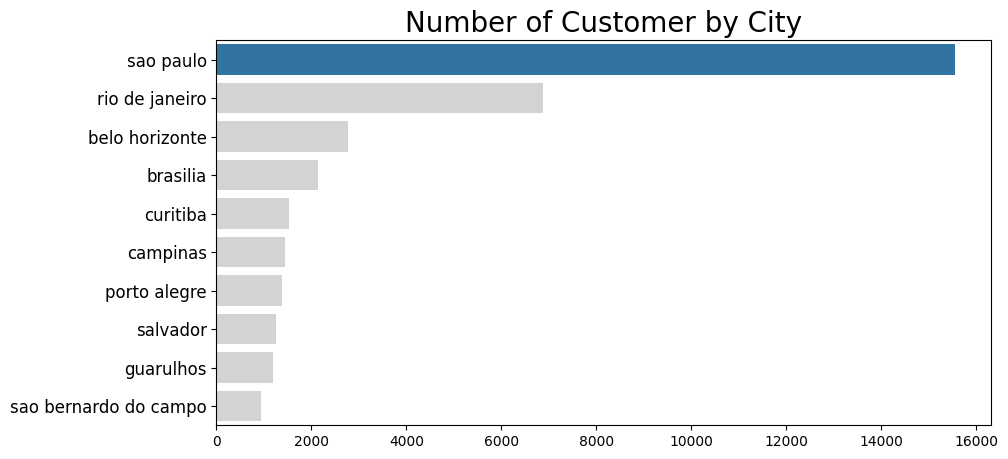

In [94]:
bycity_df = customers_dataset_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#1F77B4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Insight
* Kota-kota terbanyak yang memiliki pelanggan adalah Sao Paulo, Rio De Janeiro, Belo Horizonte, dan Brasilia.

## 2. Bagaimana Demografi Penjual

<ipython-input-95-40d8e213c405>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-95-40d8e213c405>:8: UserWarning: The palette list has more values (11) than needed (6), which may not be intended.
  sns.barplot(


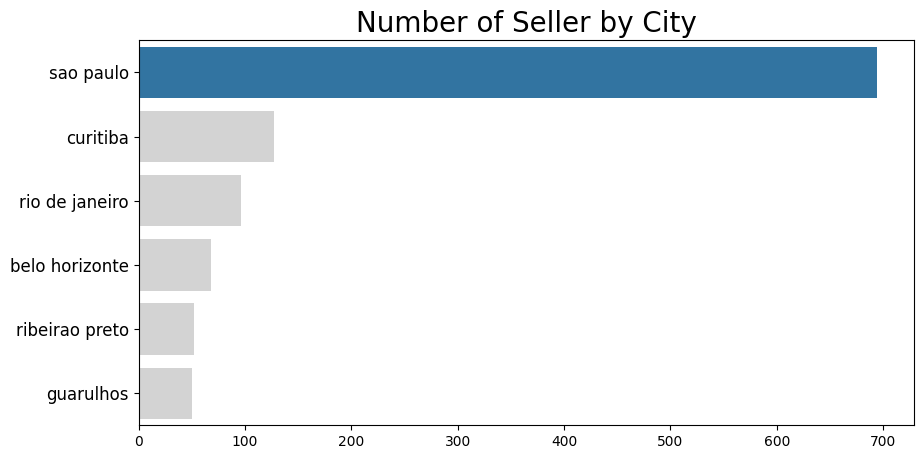

In [95]:
bycity_seller_df = sellers_dataset_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(6)
bycity_seller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bycity_seller_df
plt.figure(figsize=(10, 5))
colors_ = ["#1F77B4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","D3D3D3","#D3D3D3"]
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=bycity_seller_df.sort_values(by="seller_count", ascending=False),
    palette=colors_
)
plt.title("Number of Seller by City", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Insight
* Kota-Kota yang memiliki penjual terbanyak adalah Sao Paulo, Curitiba, dan Rio De Janeiro.

## 3. Apa produk yang laris memiliki revenue terbesar dan produk yang kurang laris dengan revenue yang lebih kecil?


In [96]:
sum_order_items_df = all_df.groupby("product_category_name").price.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,price
0,beleza_saude,1297490.77
1,cama_mesa_banho,1283507.61
2,relogios_presentes,1253143.30
3,esporte_lazer,1023996.34
4,informatica_acessorios,942277.57
5,moveis_decoracao,765093.89
6,utilidades_domesticas,666587.00
7,cool_stuff,662309.49
8,automotivo,616752.51
9,ferramentas_jardim,518217.54


<ipython-input-97-b56a86cd53ce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-97-b56a86cd53ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_order_items_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])


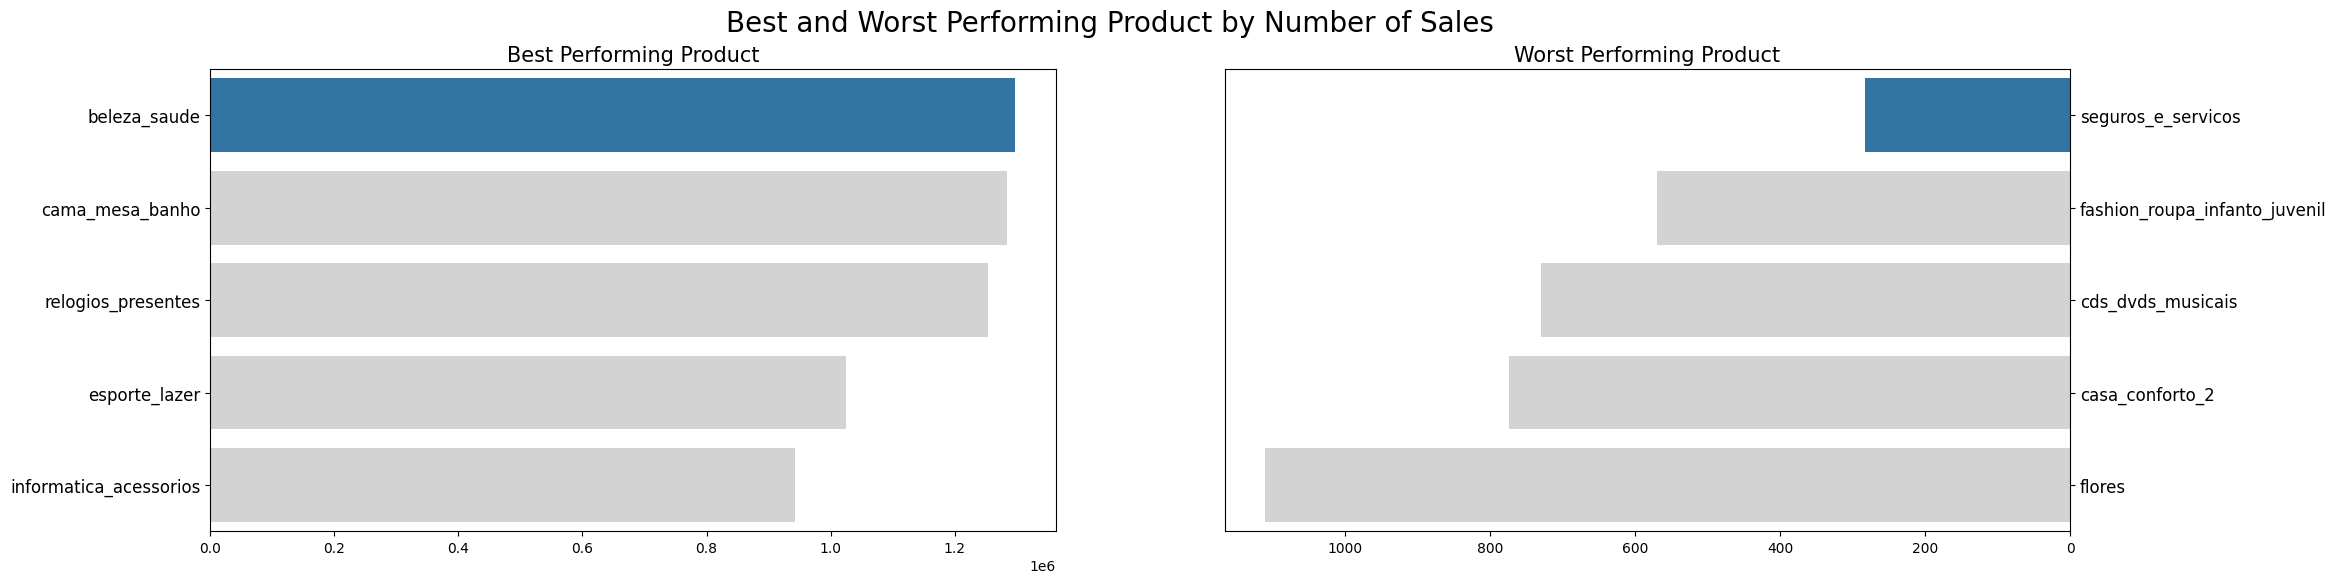

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#1F77B4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="price", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="price", y="product_category_name", data=sum_order_items_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Insight
* Produk-produk yang paling laris adalah beleza saude, cama mesa banho, dan relogios presentes.
* Produk yang kurang laris adalah flores casa conforta, dan fashion roupa infanto juvenil.

## RFM Analysis

In [147]:
rfm_df = all_df.groupby(by="product_category_name", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["product_category_name", "maximum_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["maximum_order_timestamp"] = pd.to_datetime(rfm_df["maximum_order_timestamp"])
rfm_df["maximum_order_timestamp"] = rfm_df["maximum_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].max()
recent_date = pd.to_datetime(recent_date)


rfm_df.drop("maximum_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,product_category_name,frequency,monetary
0,agro_industria_e_comercio,182,83841.95
1,alimentos,450,30119.44
2,alimentos_bebidas,227,16363.53
3,artes,202,24721.97
4,artes_e_artesanato,23,1814.01


<ipython-input-146-0789eda2b9c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="product_category_name", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-146-0789eda2b9c0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="product_category_name", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])


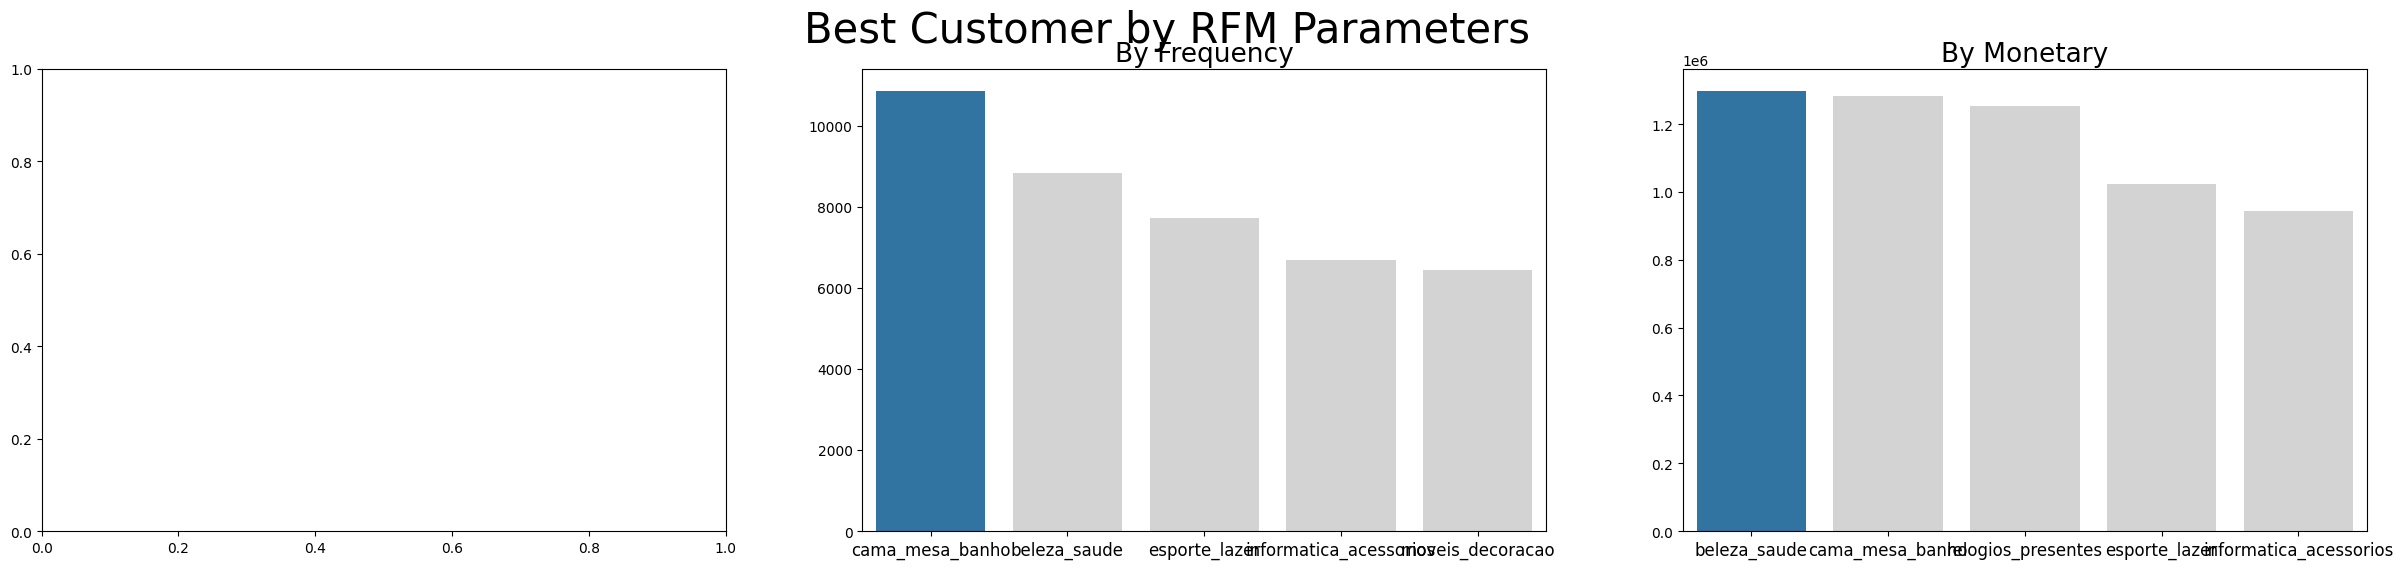

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors= ["#1F77B4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]




# Bagian Frequency
sns.barplot(y="frequency", x="product_category_name", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=19)
ax[1].tick_params(axis='x', labelsize=12)

# Bagian Monetary
sns.barplot(y="monetary", x="product_category_name", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=19)
ax[2].tick_params(axis='x', labelsize=12)

plt.suptitle("Best Customer by RFM Parameters", fontsize=30)
plt.show()

## Geospatial analysis

<Figure size 1000x500 with 0 Axes>

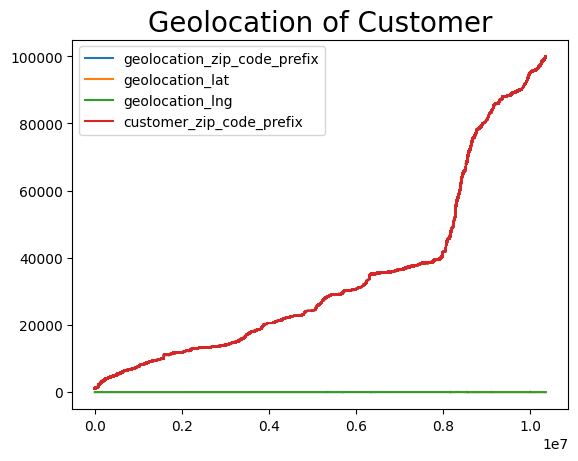

In [101]:
plt.figure(figsize=(10, 5))
gf = pd.merge(
    left=geolocation_dataset_df,
    right=customers_dataset_df,
    how="left",
    left_on="geolocation_zip_code_prefix",
    right_on="customer_zip_code_prefix"

)
gf.plot()
plt.title("Geolocation of Customer", loc="center", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [102]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("all_data.csv")